task-1

In [5]:
import pandas as pd
import random

    # Define the number of rows for the dataset
num_rows = 100

# Create a dictionary to store the data
data = {
    'Name': ['Person ' + str(i) for i in range(1, num_rows + 1)],
    'Occupation': [random.choice(['Engineer', 'Teacher', 'Doctor', 'Artist']) for _ in range(num_rows)],
    'Age': [random.randint(20, 60) for _ in range(num_rows)],
    'Gender': [random.choice(['Male', 'Female']) for _ in range(num_rows)]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


       Name Occupation  Age  Gender
0  Person 1   Engineer   30    Male
1  Person 2   Engineer   20  Female
2  Person 3    Teacher   27  Female
3  Person 4     Doctor   50  Female
4  Person 5     Doctor   39    Male


Task-2

In [6]:
age_column_length = len(df['Age'])
print("Length of Age column:", age_column_length)

Length of Age column: 100


Task-3

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

# Create separate DataFrames for each transformation
onehot_df = df.copy()
label_df = df.copy()
norm_df = df.copy()
scaled_df = df.copy()

# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_df[['Occupation_Engineer', 'Occupation_Teacher', 'Occupation_Doctor', 'Occupation_Artist']] = \
    onehot_encoder.fit_transform(df[['Occupation']])

# Apply label encoding
label_encoder = LabelEncoder()
label_df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Apply normalization
minmax_scaler = MinMaxScaler()
norm_df['Age_normalized'] = minmax_scaler.fit_transform(df[['Age']])

# Apply standard scaling
standard_scaler = StandardScaler()
scaled_df['Age_scaled'] = standard_scaler.fit_transform(df[['Age']])

# Display the transformed DataFrames
print("One-Hot Encoding:")
print(onehot_df.head())

print("\nLabel Encoding:")
print(label_df.head())

print("\nNormalization:")
print(norm_df.head())

print("\nStandard Scaling:")
print(scaled_df.head())


One-Hot Encoding:
       Name Occupation  Age  Gender  Occupation_Engineer  Occupation_Teacher  \
0  Person 1   Engineer   30    Male                  0.0                 0.0   
1  Person 2   Engineer   20  Female                  0.0                 0.0   
2  Person 3    Teacher   27  Female                  0.0                 0.0   
3  Person 4     Doctor   50  Female                  0.0                 1.0   
4  Person 5     Doctor   39    Male                  0.0                 1.0   

   Occupation_Doctor  Occupation_Artist  
0                1.0                0.0  
1                1.0                0.0  
2                0.0                1.0  
3                0.0                0.0  
4                0.0                0.0  

Label Encoding:
       Name Occupation  Age  Gender  Gender_encoded
0  Person 1   Engineer   30    Male               1
1  Person 2   Engineer   20  Female               0
2  Person 3    Teacher   27  Female               0
3  Person 4     Doctor  

task-4

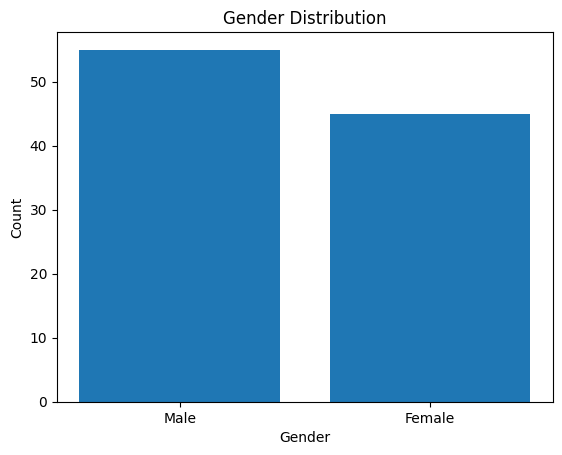

In [8]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()